# Prettiest Neighborhood in Pittsburgh
### Introduction:
We are looking for the prettiest neighborhood in Pittsburgh by using the number of public art, water features, and greenways. We came up with this by looking at by going through the website and seeing multiple datasets that relate to it. Our alternative was easiest neighborhood to rob someone in and get away with it.
### Metric:
Our metric is the standardized prettiness scale, which is created by using the percentage of public art, decorative water features, and greenways and then averaging the result. The higher the number the prettier the neighborhood.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Part 1: Public Art
Public art is a great way to measure how appealing a neighborhood is to look at as they provide something nice to contrast a bunch of boring buildings.

In [29]:
#counts
data_art = pd.read_csv("public_art.csv", sep=',')
data_art.dropna()

neighborhoods_art = data_art['neighborhood']
count_art = {}
#adding all the neighborhoods to the array
for name in neighborhoods_art:
    if name in count_art:
        count_art[name] = count_art.get(name) + 1
    else:
        count_art[name] = 1

print("How much public art does each neighborhood have? (Neighborhood: Count)")
print()

#printing the neighborhood and number of public art
keys = list(count_art.keys())
values = list(count_art.values())
sorted_value_index_art = np.argsort(values)[::-1]
sorted_dict_art = {keys[i]: values[i] for i in sorted_value_index_art}
for x, y in sorted_dict_art.items():
    print(x, ":", y)

How much public art does each neighborhood have? (Neighborhood: Count)

Central Business District : 27
Squirrel Hill South : 20
Allegheny Center : 18
Highland Park : 10
South Side Flats : 9
North Shore : 8
Beechview : 7
Shadyside : 6
Lower Lawrenceville : 5
Brighton Heights : 5
Central Oakland : 5
Spring Hill-City View : 4
South Side Slopes : 3
Duquesne Heights : 3
Elliott : 3
Greenfield : 3
Crawford-Roberts : 3
Point Breeze : 3
Hazelwood : 3
Beltzhoover : 3
East Allegheny : 2
Strip District : 2
Mount Washington : 2
Squirrel Hill North : 2
West End : 2
Lincoln-Lemington-Belmar : 2
Upper Hill : 2
Garfield : 2
Central Lawrenceville : 2
Allentown : 2
Perry North : 2
nan : 2
Spring Garden : 2
Brookline : 2
Carrick : 2
Manchester : 1
Allegheny West : 1
Hays : 1
Overbrook : 1
Esplen : 1
Crafton Heights : 1
Troy Hill : 1
Swisshelm Park : 1
Sheraden : 1
Regent Square : 1
Polish Hill : 1
East Hills : 1
North Oakland : 1
East Carnegie : 1
Bloomfield : 1
East Liberty : 1
Stanton Heights : 1
Upper

### Visualizing the Data:

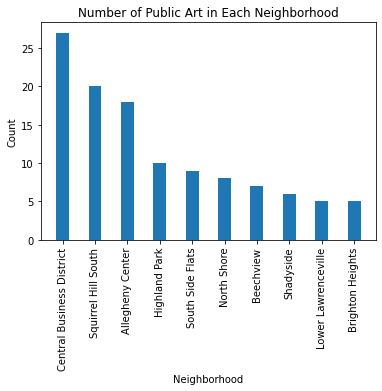

In [30]:
import matplotlib.pyplot as plt

names_art = list(sorted_dict.keys())[0:10]
values_art = list(sorted_dict.values())[0:10]

plt.bar(range(len(names_art)), values_art, width = 0.4, tick_label=names)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Public Art in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Standardizing the Data:

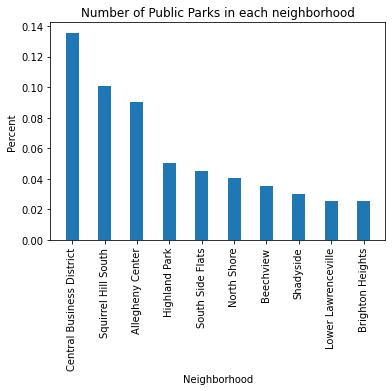

In [31]:
total_art = data_art['neighborhood'].size
for i in range(len(values_art)):
    values_art[i] = values_art[i] / total_art

plt.bar(range(len(names_art)), values_art, width = 0.4, tick_label=names_art)
plt.xlabel("Neighborhood")
plt.ylabel("Percent")
plt.title("Number of Public Parks in each neighborhood")
plt.xticks(rotation = 90)
plt.show()

# Part 2:
## Prettiest Water Features of Pittsburgh Neighborhoods
Metric that measures the total number of water features and weighs it based on the number of decorative water features to give a final value. Only neighborhood with decorative water features are give values.

### Number of water features at each neighborhood:

In [22]:
#count
data_water = pd.read_csv("water_features.csv", sep=',')

data_water.head()

neighborhoods_water = data_water['neighborhood']
count_water = {}
#adding all the neighborhoods to the array
for name in neighborhoods_water:
    if name in count_water:
        count_water[name] = count_water.get(name) + 1
    else:
        count_water[name] = 1

#printing the neighborhood and number of water features
keys_water = list(count.keys())
values_water = list(count.values())
sorted_value_index_water = np.argsort(values_water)[::-1]
sorted_dict_water = {keys_water[i]: values_water[i] for i in sorted_value_index_water}
for x, y in sorted_dict_water.items():
    print(x, ":", y)

Central Business District : 27
Squirrel Hill South : 20
Allegheny Center : 18
Highland Park : 10
South Side Flats : 9
North Shore : 8
Beechview : 7
Shadyside : 6
Lower Lawrenceville : 5
Brighton Heights : 5
Central Oakland : 5
Spring Hill-City View : 4
South Side Slopes : 3
Duquesne Heights : 3
Elliott : 3
Greenfield : 3
Crawford-Roberts : 3
Point Breeze : 3
Hazelwood : 3
Beltzhoover : 3
East Allegheny : 2
Strip District : 2
Mount Washington : 2
Squirrel Hill North : 2
West End : 2
Lincoln-Lemington-Belmar : 2
Upper Hill : 2
Garfield : 2
Central Lawrenceville : 2
Allentown : 2
Perry North : 2
nan : 2
Spring Garden : 2
Brookline : 2
Carrick : 2
Manchester : 1
Allegheny West : 1
Hays : 1
Overbrook : 1
Esplen : 1
Crafton Heights : 1
Troy Hill : 1
Swisshelm Park : 1
Sheraden : 1
Regent Square : 1
Polish Hill : 1
East Hills : 1
North Oakland : 1
East Carnegie : 1
Bloomfield : 1
East Liberty : 1
Stanton Heights : 1
Upper Lawrenceville : 1
Perry South : 1
Knoxville : 1
Oakwood : 1


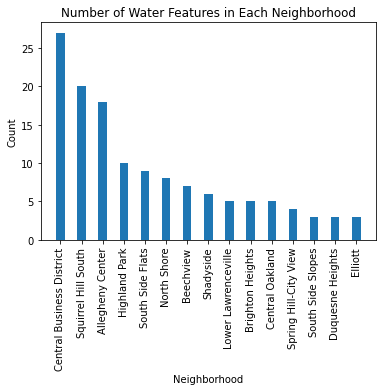

In [25]:
names_water = list(sorted_dict_water.keys())[0:15]
values_water = list(sorted_dict_water.values())[0:15]

plt.bar(range(len(names_water)), values_water, width = 0.4, tick_label=names_water)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Water Features in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Narrowing down to only neighborhood with decorative water features:

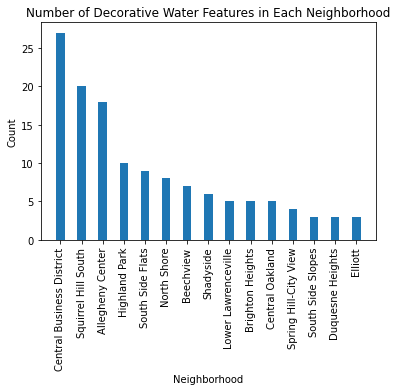

In [26]:
data_water = data_water[~data_water['name'].str.isnumeric()]
decorative_counts_water = data_water[data_water['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_dict_water = dict(sorted(decorative_counts_water.items(), key=lambda item: item[1], reverse=True))

names_water = list(sorted_dict.keys())[0:15]
values_water = list(sorted_dict.values())[0:15]

plt.bar(range(len(names_water)), values_water, width = 0.4, tick_label=names_water)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Decorative Water Features in Each Neighborhood")
plt.xticks(rotation = 90)

plt.show()

### Standardizing the Data:

In [27]:
data_water = data_water[~data_water['name'].str.isnumeric()]
neighborhood_counts_water = data_water.groupby('neighborhood').size()
decorative_counts_water = data_water[data_water['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_neighborhoods_water = sorted(decorative_counts_water.items(), key=lambda item: neighborhood_counts_water[item[0]] * (0.1 * item[1] + 1), reverse=True)

for neighborhood, count in sorted_neighborhoods_water:
    total_count = neighborhood_counts_water[neighborhood]
    product = total_count * ((0.1 * count) + 1)
    print(f'{neighborhood}: {count} decorative water features ({total_count} total water features) -> {round(product, 1)}')

Squirrel Hill South: 2 decorative water features (14 total water features) -> 16.8
Highland Park: 1 decorative water features (12 total water features) -> 13.2
Allegheny Center: 2 decorative water features (8 total water features) -> 9.6
East Liberty: 1 decorative water features (6 total water features) -> 6.6
Point Breeze: 2 decorative water features (5 total water features) -> 6.0
Central Oakland: 1 decorative water features (2 total water features) -> 2.2


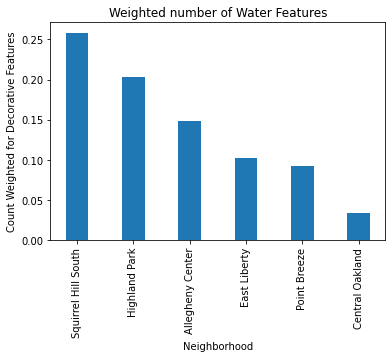

In [28]:
products = []
for neighborhood, count in decorative_counts_water.items():
    total_count = neighborhood_counts_water[neighborhood]
    product = total_count * ((0.1 * count)+1)
    unique_neighborhoods = data['neighborhood'].nunique()
    product/=unique_neighborhoods
    products.append(product)

data_products_water = pd.DataFrame({
    'Neighborhood': decorative_counts_water.index,
    'Decorative Count': decorative_counts_water.values,
    'Total Count': neighborhood_counts_water[decorative_counts_water.index].values,
    'Product': products
})

data_products_water = data_products_water.sort_values('Product', ascending=False)
data_top15 = data_products.head(15)

plt.bar(range(len(data_top15)), data_top15['Product'], width = 0.4, tick_label=data_top15['Neighborhood'])
plt.xlabel("Neighborhood")
plt.ylabel("Count Weighted for Decorative Features")
plt.title("Weighted number of Water Features")
plt.xticks(rotation = 90)
plt.show()

## Part 3: Greenways
aka the amount of greenspace

## Part 4: Combining the Data